# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.



## Anwsers

* 1. We are trying to classify the  Pokemon's Legendary category, which is True or False. 
* 2. We are performing binary classification task. 

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [1]:
#Reading Pokemon dataset via URL with Pandas
import pandas as pd
data = pd.read_csv("https://www2.cs.arizona.edu/classes/cs120/fall17/ASSIGNMENTS/assg02/Pokemon.csv")

## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [6]:
#Dataset is in Tablular/Data Frame format
data = pd.DataFrame(data)
data.tail(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?



In [7]:
#1: Shape
print('Number of features:', data.shape[1] ,"\n")
print('Number of samples(size):', data.shape[0] ,"\n")

Number of features: 13 

Number of samples(size): 800 



In [8]:
#2:Dataset attributes and their Data Types
print("Feature names: ",data.columns)
print("We have categorical and numberical independent features(data attributes):\n" , data.dtypes,"\n")

Feature names:  Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
We have categorical and numberical independent features(data attributes):
 #              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object 



# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


In [9]:
print("Target categories count: \n ", data.Legendary.value_counts())

Target categories count: 
  False    735
True      65
Name: Legendary, dtype: int64


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

In [10]:
#Dropping ID and Name features as these ID and Name of Pokemon
data = data.drop(['#','Name'], axis=1)
data.head(5).style.background_gradient(cmap='GnBu')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,nan,309,39,52,43,60,50,65,1,False


In [11]:
#Duplicate Rows/records
data[data.duplicated()]

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
291,Bug,NaN,205,50,35,55,25,25,15,3,False
714,Water,Fighting,580,91,72,90,129,90,108,5,False
747,Psychic,NaN,466,74,48,76,83,81,104,6,False


In [12]:
#We will be keeping first occurence of duplicate records and drop remaining onces: Use keep='first' to keep the first occurrence 
data = data.drop_duplicates(keep='first')
print("Shape: ", data.shape)

Shape:  (797, 11)


In [20]:
#Missing value is only present in Type 2 feature
print(data['Type 2'].value_counts())

print('*'*100)
print('Missing value count of each features:')
data.isnull().sum()

#Note:
#Type 2 has almost 48% NA, We can better drop the feature. 
#If we try impute the feature we will be using prediction based approach but due to high level count and less size, classfication model will not be good due to class imbalance.

Flying      97
Ground      35
Poison      34
Psychic     33
Grass       25
Fighting    25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64
****************************************************************************************************
Missing value count of each features:


Type 1          0
Type 2        384
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [21]:
#Dropping Type 2 feature as it has 48% Missing value, As mentioned above.
data = data.drop(['Type 2'], axis=1)
data.shape

(797, 10)

In [22]:
#Numberical feature data distribution
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      797 non-null    object
 1   Total       797 non-null    int64 
 2   HP          797 non-null    int64 
 3   Attack      797 non-null    int64 
 4   Defense     797 non-null    int64 
 5   Sp. Atk     797 non-null    int64 
 6   Sp. Def     797 non-null    int64 
 7   Speed       797 non-null    int64 
 8   Generation  797 non-null    int64 
 9   Legendary   797 non-null    bool  
dtypes: bool(1), int64(8), object(1)
memory usage: 63.0+ KB


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000
mean,435.170640,69.249686,79.104141,73.843162,72.796738,71.927227,68.249686,3.318695
std,119.796796,25.561467,32.461348,31.229725,32.677445,27.822431,28.992100,1.660603
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.000000
50%,450.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000
75%,515.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.000000
max,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000


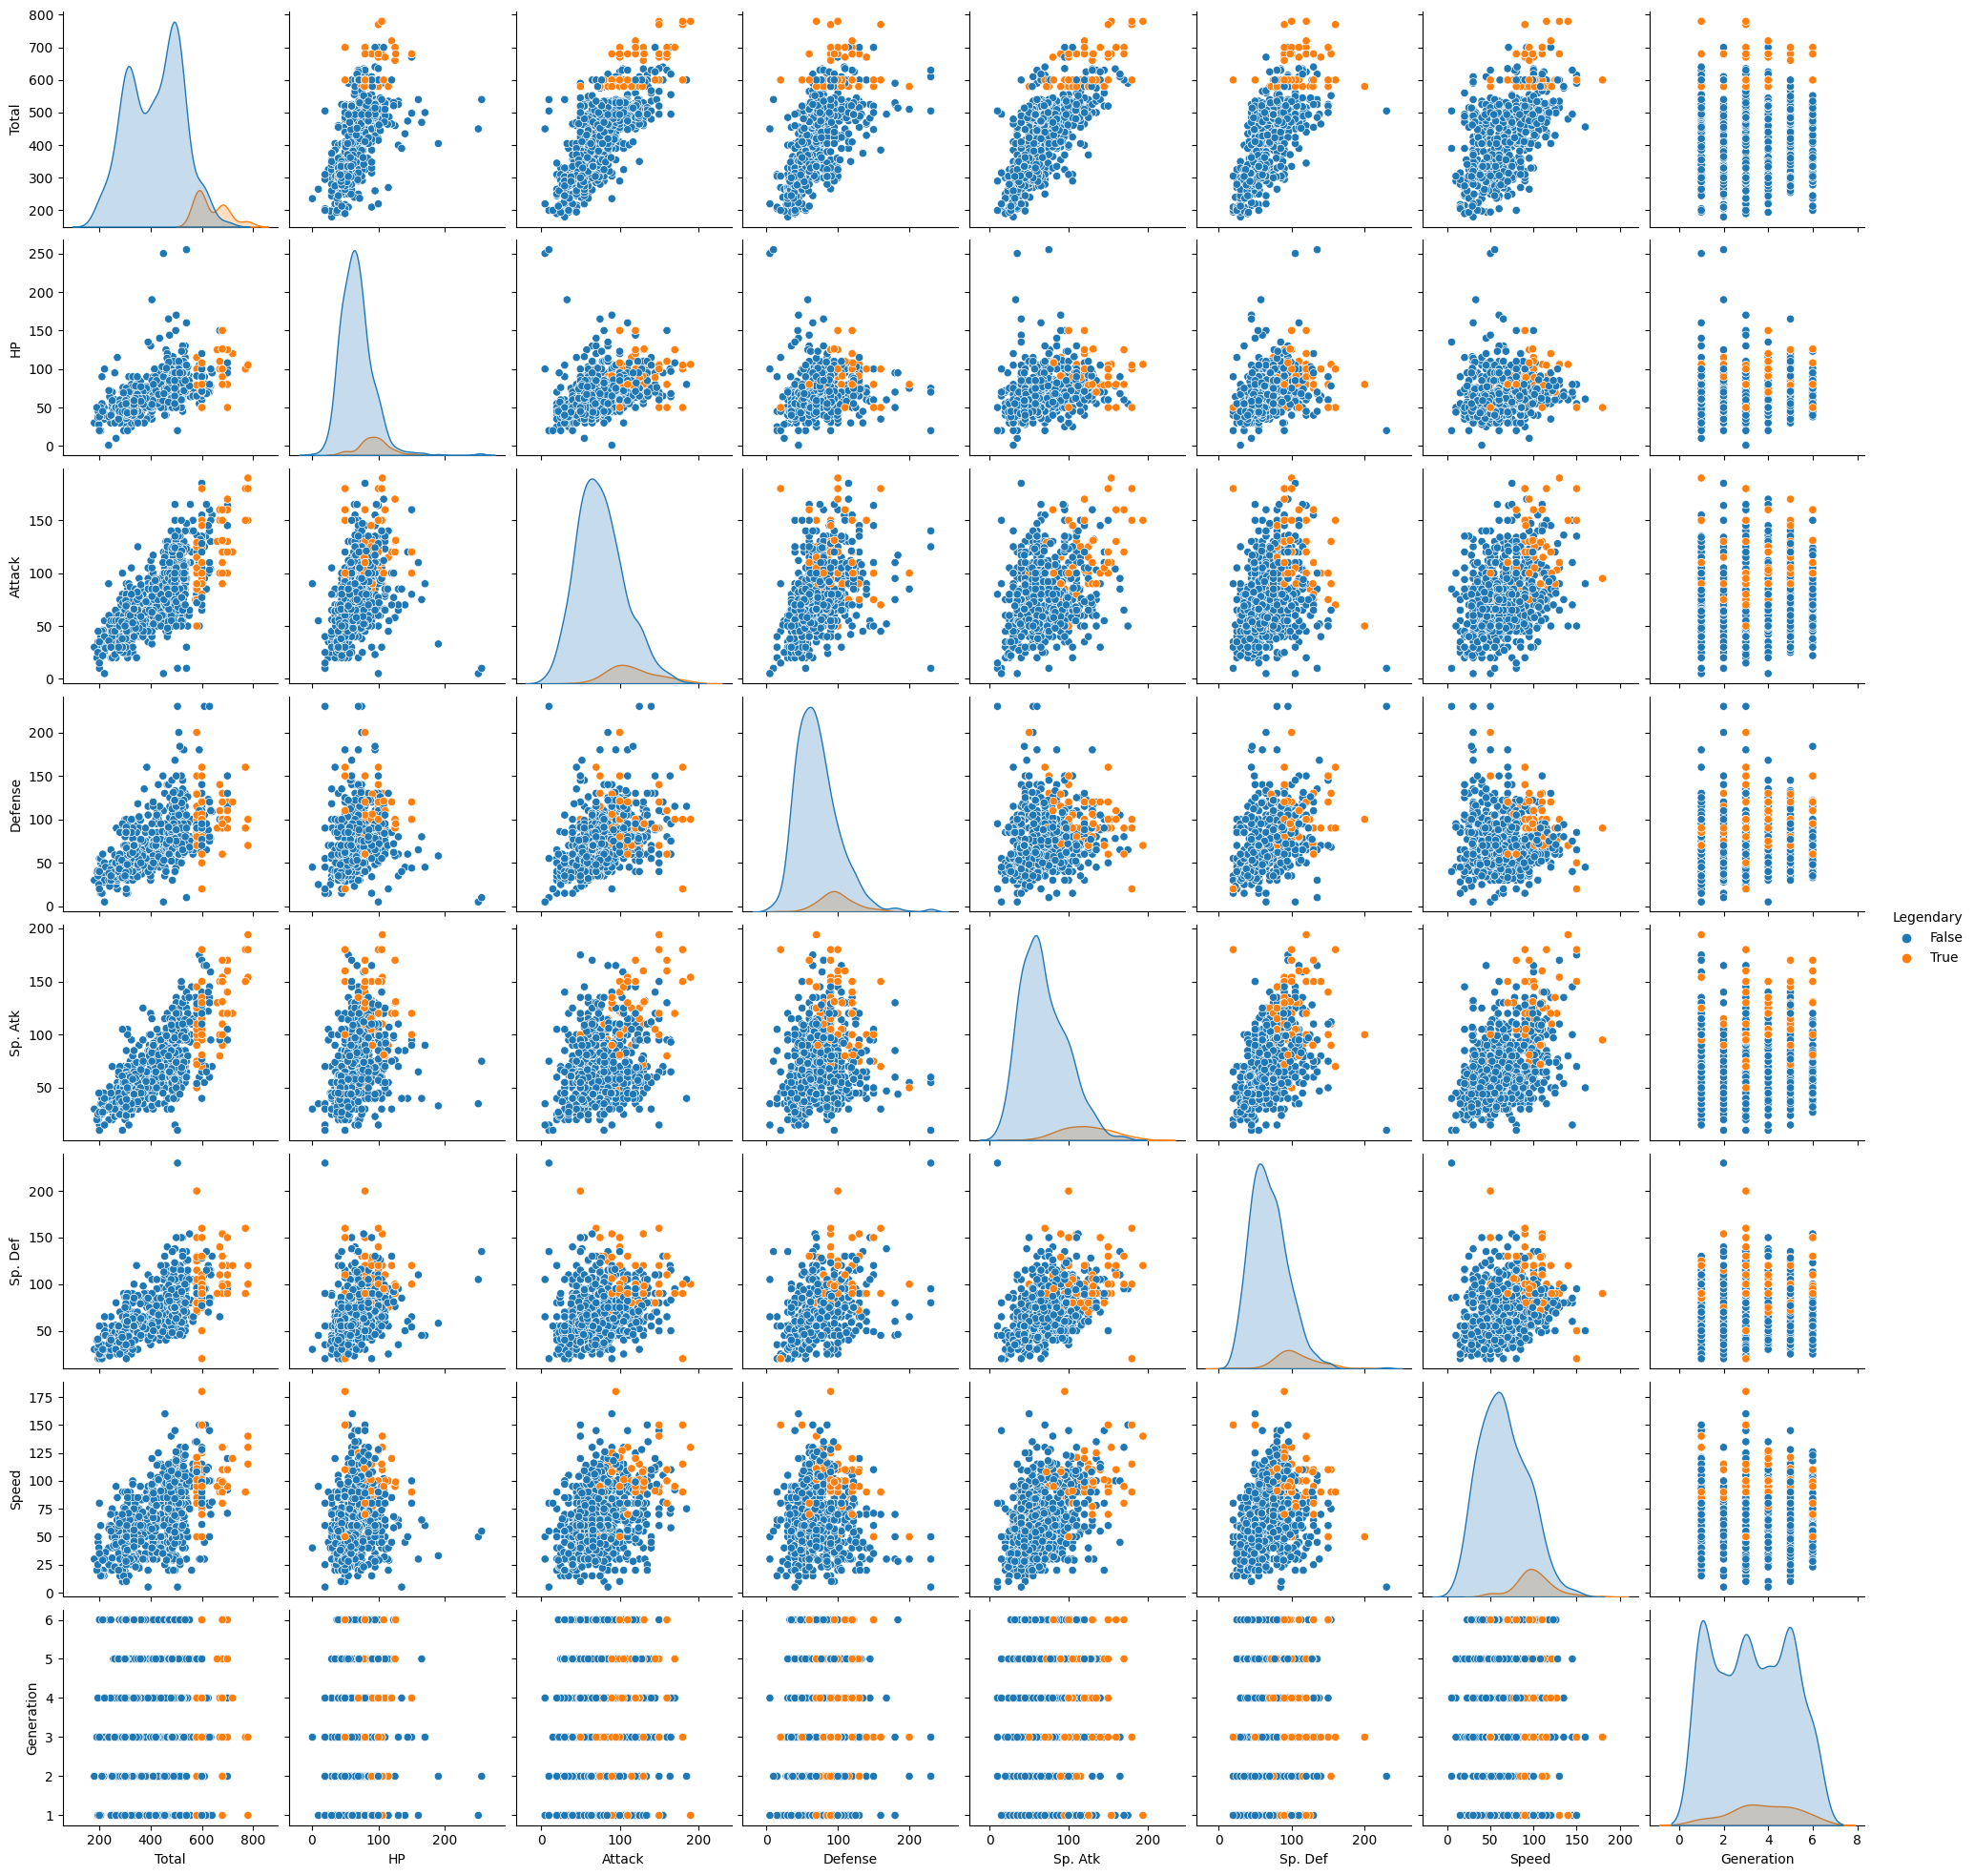

In [24]:
#Data distribution of each numerical feature wrt target Legendary 
import seaborn as sns 
sns.pairplot(data=data,hue='Legendary')
#Note:
#All features are evenly distributed.

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_12208\1434456014.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= data.corr()


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618120,0.737285,0.612774,0.745894,0.716319,0.573366,0.046129,0.503315
HP,0.618120,1.000000,0.422653,0.238778,0.360568,0.377469,0.173355,0.057227,0.273999
Attack,0.737285,0.422653,1.000000,0.438830,0.396703,0.262709,0.382255,0.053545,0.345128
Defense,0.612774,0.238778,0.438830,1.000000,0.222113,0.510303,0.012907,0.041589,0.246510
Sp. Atk,0.745894,0.360568,0.396703,0.222113,1.000000,0.504213,0.469753,0.033468,0.450657
Sp. Def,0.716319,0.377469,0.262709,0.510303,0.504213,1.000000,0.255267,0.026715,0.364503
Speed,0.573366,0.173355,0.382255,0.012907,0.469753,0.255267,1.000000,-0.027958,0.328443
Generation,0.046129,0.057227,0.053545,0.041589,0.033468,0.026715,-0.027958,1.000000,0.080898
Legendary,0.503315,0.273999,0.345128,0.246510,0.450657,0.364503,0.328443,0.080898,1.000000


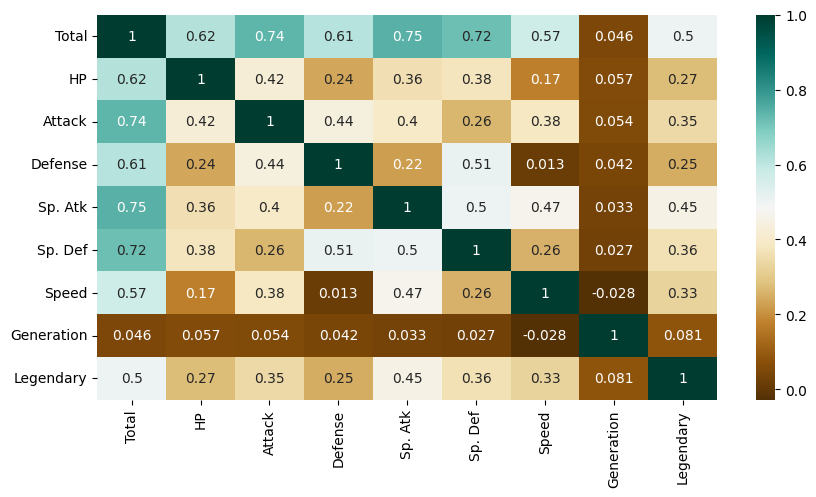

In [26]:
# Correlation between variables and dependent variable
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline   
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#Note:
#We dont see any highly positive or negative Correlation b/w features.

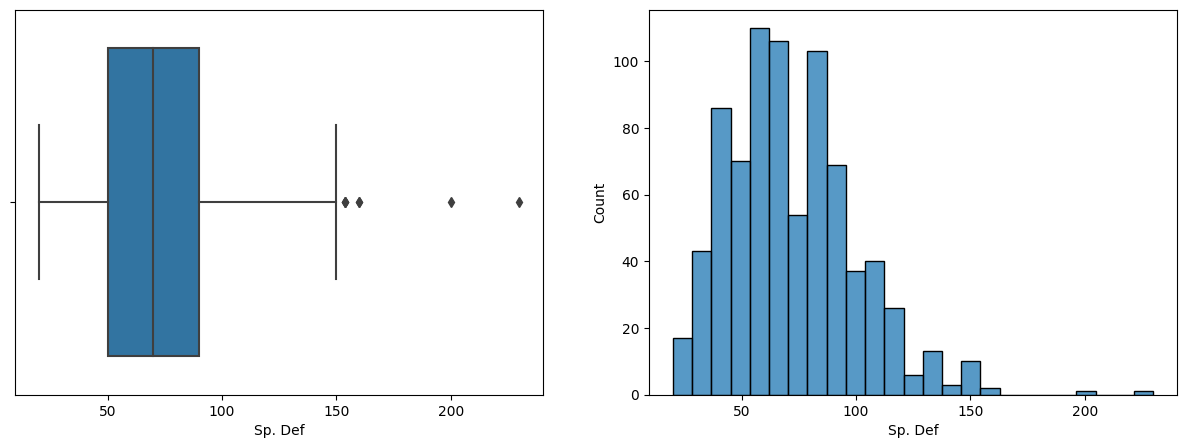

In [27]:
#Sp. Def  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Sp. Def', ax=ax[0])

#Note
#Data is not normally distributed

#Sp. Def  histogram
sns.histplot(data=data, x='Sp. Def', ax=ax[1])
plt.show()
#Note
#Outliers present

In [28]:
#Treatment for outliers values: Sp. Def
import numpy as np
Q1=data['Sp. Def'].quantile(0.25)
Q3=data['Sp. Def'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['Sp. Def'] = np.where((data['Sp. Def']>Upper_Whisker),data['Sp. Def'].quantile(0.90),
                             np.where((data['Sp. Def']<Lower_Whisker),data['Sp. Def'].quantile(0.10),data['Sp. Def']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

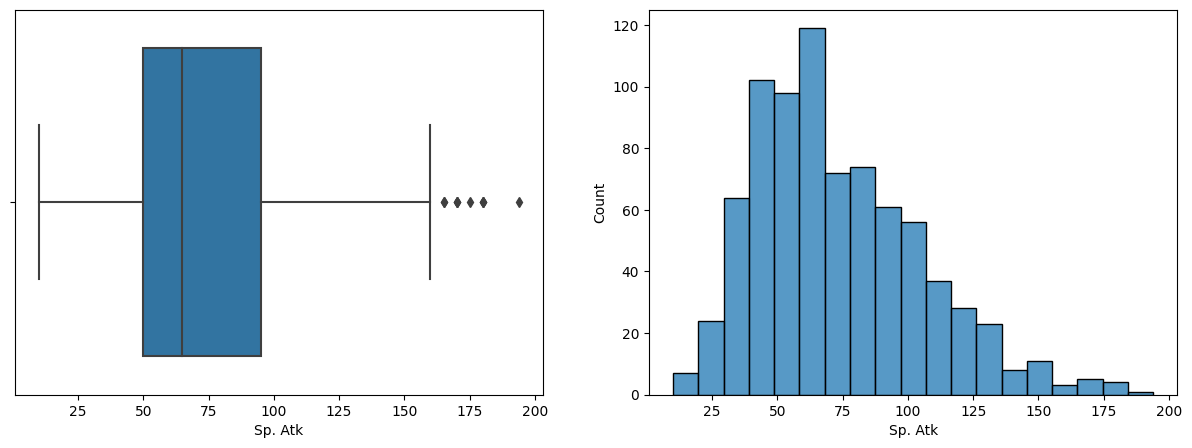

In [29]:
#Sp. Atk  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Sp. Atk', ax=ax[0])

#Note
#Data is not normally distributed

#Sp. Atk  histogram
sns.histplot(data=data, x='Sp. Atk', ax=ax[1])
plt.show()
#Note
#Outliers present

In [30]:
#Treatment for outliers values: Sp. Atk
import numpy as np
Q1=data['Sp. Atk'].quantile(0.25)
Q3=data['Sp. Atk'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['Sp. Atk'] = np.where((data['Sp. Atk']>Upper_Whisker),data['Sp. Atk'].quantile(0.90),
                             np.where((data['Sp. Atk']<Lower_Whisker),data['Sp. Atk'].quantile(0.10),data['Sp. Atk']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

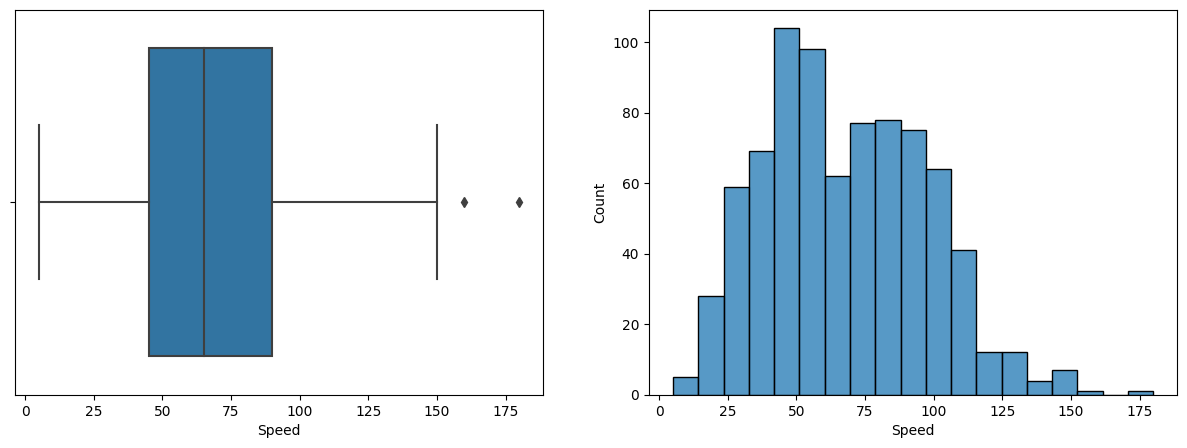

In [31]:
#Speed  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Speed', ax=ax[0])

#Note
#Data is not normally distributed

#Speed  histogram
sns.histplot(data=data, x='Speed', ax=ax[1])
plt.show()
#Note
#Outliers present

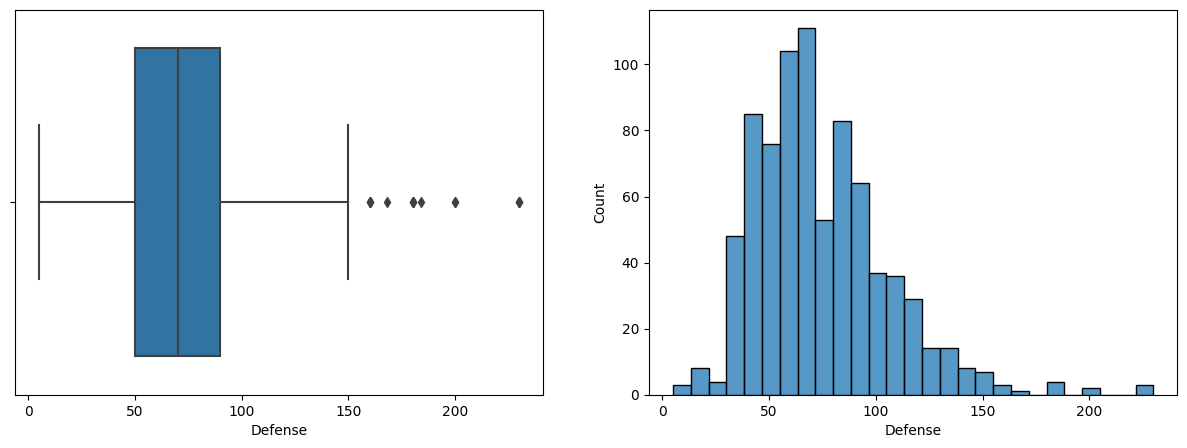

In [32]:
#Defense  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Defense', ax=ax[0])

#Note
#Data is not normally distributed

#Defense  histogram
sns.histplot(data=data, x='Defense', ax=ax[1])
plt.show()
#Note
#Outliers present

In [33]:
#Treatment for outliers values: Defense
import numpy as np
Q1=data['Defense'].quantile(0.25)
Q3=data['Defense'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['Defense'] = np.where((data['Defense']>Upper_Whisker),data['Defense'].quantile(0.90),
                             np.where((data['Defense']<Lower_Whisker),data['Defense'].quantile(0.10),data['Defense']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

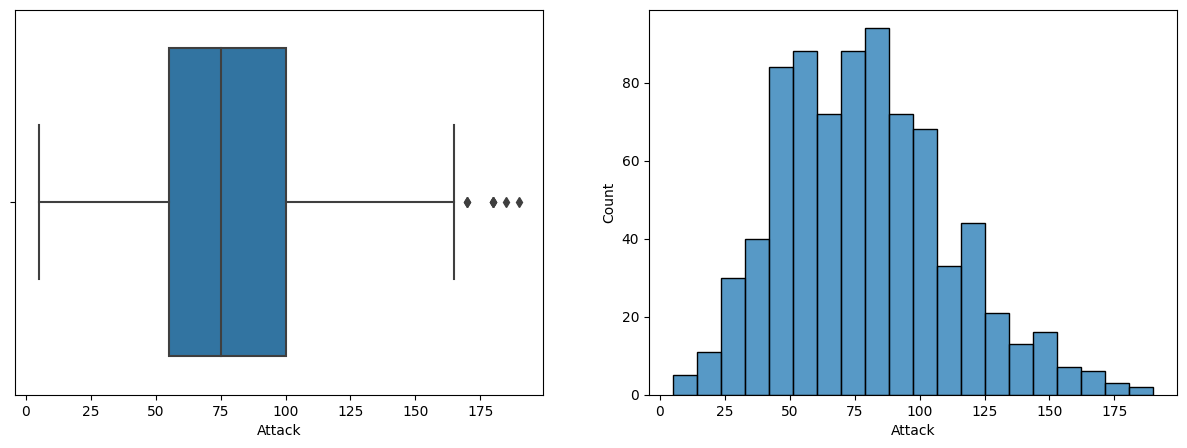

In [34]:
#Attack  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Attack', ax=ax[0])

#Note
#Data is not normally distributed

#Attack  histogram
sns.histplot(data=data, x='Attack', ax=ax[1])
plt.show()
#Note
#Outliers present

In [35]:
#Treatment for outliers values: Attack
import numpy as np
Q1=data['Attack'].quantile(0.25)
Q3=data['Attack'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['Attack'] = np.where((data['Attack']>Upper_Whisker),data['Attack'].quantile(0.90),
                             np.where((data['Attack']<Lower_Whisker),data['Attack'].quantile(0.10),data['Attack']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

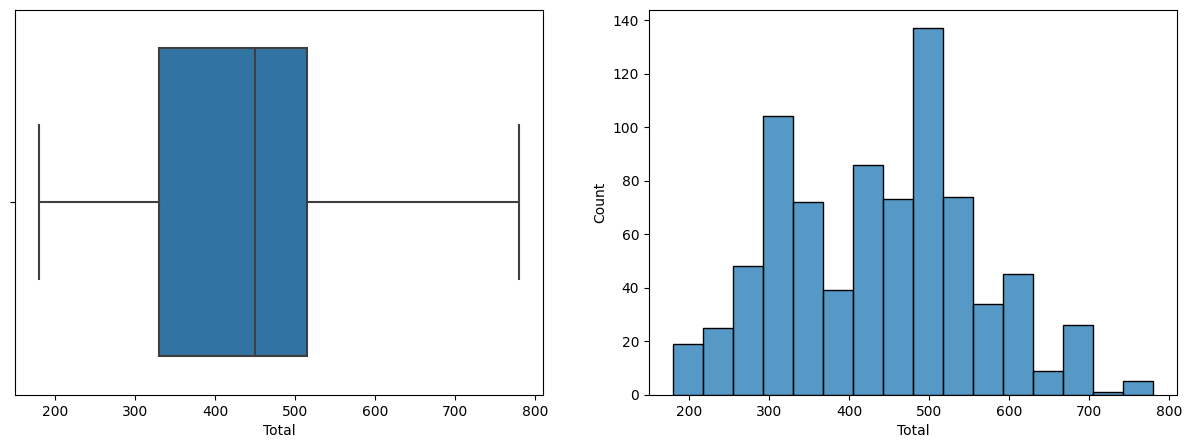

In [36]:
#Total  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Total', ax=ax[0])

#Note
#Data is normally distributed

#Total  histogram
sns.histplot(data=data, x='Total', ax=ax[1])
plt.show()
#Note
#No outliers present

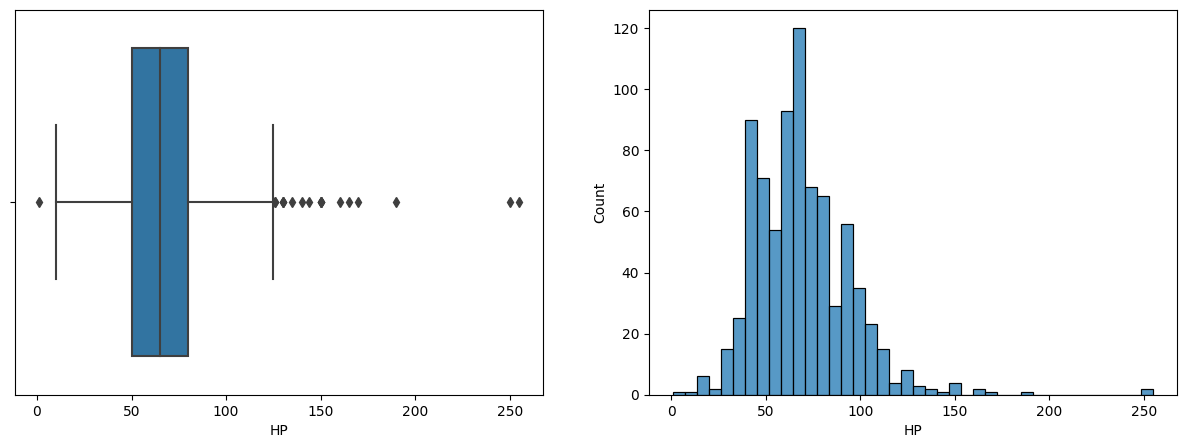

In [37]:
#HP  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='HP', ax=ax[0])

#Note
#Data is not normally distributed

#HP  histogram
sns.histplot(data=data, x='HP', ax=ax[1])
plt.show()
#Note
#Outliers present

In [38]:
#Treatment for outliers values: HP
import numpy as np
Q1=data['HP'].quantile(0.25)
Q3=data['HP'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['HP'] = np.where((data['HP']>Upper_Whisker),data['HP'].quantile(0.90),
                             np.where((data['HP']<Lower_Whisker),data['HP'].quantile(0.10),data['HP']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

Text(0.5, 1.0, ' Types of customers(Target Feature) ')

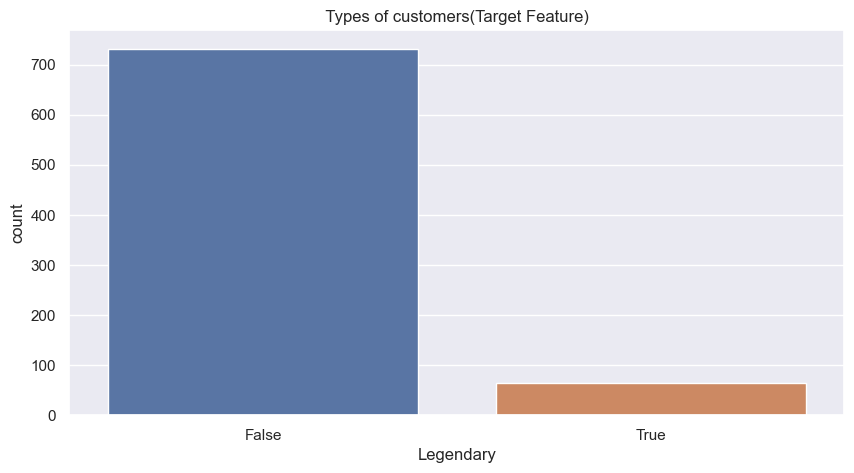

In [39]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

plt.figure(figsize = (10, 5))
sns.countplot(x = 'Legendary', data = data)
plt.title(" Types of customers(Target Feature) ")

#Note:
#Target feature is imbalanced class. 

## 3.2 Encode categorical data

In [40]:
#One-hot encoding for categorical features
Xen = data[['Type 1','Generation']]
Xen = pd.get_dummies(Xen)
data = pd.concat([data, Xen.reindex(data.index)], axis=1)
data = data.drop(['Type 1','Generation'], axis=1)
data.head(3)

#Note:
#One-Hot Encoding for categorical 

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type 1_Bug,Type 1_Dark,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,318,45.0,49.0,49.0,65.0,65.0,45,False,0,0,...,0,1,0,0,0,0,0,0,0,0
1,405,60.0,62.0,63.0,80.0,80.0,60,False,0,0,...,0,1,0,0,0,0,0,0,0,0
2,525,80.0,82.0,83.0,100.0,100.0,80,False,0,0,...,0,1,0,0,0,0,0,0,0,0


## 3.3 Normalize the data

In [41]:
#Standardize the Variables: on Train dataset
from sklearn.preprocessing import StandardScaler
col_names = ['Total', 'HP', 'Attack','Defense','Sp. Atk', 'Sp. Def','Speed']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
data = data.drop(['Total', 'HP', 'Attack','Defense','Sp. Atk', 'Sp. Def','Speed'], axis=1)
data = pd.concat([data, scaled_features.reindex(data.index)], axis=1)
data.head(2)

#Note:
#Numerical feature with differnt scales, Needs to be Normalize

,Legendary,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,...,Type 1_Rock,Type 1_Steel,Type 1_Water,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.978692,-1.074984,-0.945380,-0.850571,-0.229137,-0.242156,-0.802435
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.252007,-0.373295,-0.530563,-0.346633,0.254417,0.330200,-0.284728


## 3.4 Feature Engineering 

if any

In [42]:
#Dropping rows with missing values
data.dropna(axis = 0, how = 'any', inplace = True)
print(data.shape)
data.isnull().sum()
#No need for any feature engineering in the dataset

(794, 26)


Legendary          0
Type 1_Bug         0
Type 1_Dark        0
Type 1_Dragon      0
Type 1_Electric    0
Type 1_Fairy       0
Type 1_Fighting    0
Type 1_Fire        0
Type 1_Flying      0
Type 1_Ghost       0
Type 1_Grass       0
Type 1_Ground      0
Type 1_Ice         0
Type 1_Normal      0
Type 1_Poison      0
Type 1_Psychic     0
Type 1_Rock        0
Type 1_Steel       0
Type 1_Water       0
Total              0
HP                 0
Attack             0
Defense            0
Sp. Atk            0
Sp. Def            0
Speed              0
dtype: int64

## 3.5 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



## Anwsers

* Dependent and Independent features are seperated via X and y dataframes.
* On all nominal categorical Independent features are transformed via one-hot encoding in above code lines.

In [46]:
#X is the independent feature and y is the target or label
y = data.Legendary.astype(int)
X = data.drop(['Legendary'],axis=1)

In [47]:
X.head(2)

,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,...,Type 1_Rock,Type 1_Steel,Type 1_Water,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,-0.978692,-1.074984,-0.945380,-0.850571,-0.229137,-0.242156,-0.802435
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,-0.252007,-0.373295,-0.530563,-0.346633,0.254417,0.330200,-0.284728


In [48]:
y.head(2)

0    0
1    0
Name: Legendary, dtype: int32

## 3.6 Split the data into training set and testing set

In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y ,random_state = 0)

## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset



## Anwsers

* We have dropped '#','Name' features as these are ID and Name, Which not contribute in Model building
* Type 2 has almost 48% Missing value and dropped rows with NAs, We can better drop the feature. If we try impute the feature we will be using prediction based approach but due to high level count and less size, classfication model will not be good due to class imbalance.
* 'Type 1','Generation' is nominal categorical data type, We have converted into numbers by one-hot encoding transformation
* 'Total', 'HP', 'Attack','Defense','Sp. Atk', 'Sp. Def','Speed' features with differnt scales and ranges are normalized via StandardScaler, so all features scales are normally distributed.

# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [51]:
#sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

#Weights and Bias initialization are done by keras default method glorot_uniform

#Initailizing Model-Dense is used because its fully connected NN layers
classifier = Sequential()

#First hidden layer" activation = 'relu' is used to avoid vanishing/exploding gradient problem and input_dim = 25 because we have 25 independent features
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))

#Second hidden layer: activation = 'relu' is used to avoid vanishing/exploding gradient problem
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

#Third hidden layer: activation = 'relu' is used to avoid vanishing/exploding gradient problem
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

#Output layer: activation = 'sigmoid' as output is binary
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                312       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 



## Anwsers

* We 4 layers, Input, three hidden layers and output layers, as per model performance, Even tired keras-tuner for getting right set of NN and their parameters values.
* First/Input layer has 12 units, Second layer has 8 units, third layer has 6 units and Output layer has 1 units
* We have used relu activation function('relu' is used to avoid vanishing/exploding gradient problem) in 1st, 2nd and 3rd layers * Sigmoid activation function is used in output layer as we are doing binary classification. 
* Total params: 477 are being used

# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations



In [52]:
#Compiling the model:
#loss = 'binary_crossentropy' is the lose function. binary_crossentropy: Used as a loss function for binary classification model. The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels.
#optimizer = 'adam'. Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses 
#metrics = ['accuracy']. metrics is used for performance metrics calculation of model for classification
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## 5.2 Train the model

In [53]:
#Fitting the model with data
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='min'
)
#callbacks=[early_stopping]
#EarlyStopping was giving less accuracy due to small size of data
model_history=classifier.fit(X_train, 
                             y_train,
                             validation_split=0.33, 
                             batch_size = 10, 
                             epochs = 100
                             )

Epoch 1/100


C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


43/43 [==============================] - 1s 7ms/step - loss: 0.6726 - accuracy: 0.9059 - val_loss: 0.6484 - val_accuracy: 0.9238
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.9200 - val_loss: 0.5721 - val_accuracy: 0.9238
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.9200 - val_loss: 0.4249 - val_accuracy: 0.9238
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.9200 - val_loss: 0.2975 - val_accuracy: 0.9238
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2616 - accuracy: 0.9200 - val_loss: 0.2390 - val_accuracy: 0.9238
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9200 - val_loss: 0.2119 - val_accuracy: 0.9238
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9200 - val_loss: 0.1963 - val_accuracy: 0.9238
Epoch 8/100
43/43 [======

Justify your choice of optimizers and regulizations used and the hyperparameters tuned



## Anwsers
* Adam uses estimations of the first and second moments of the gradient to adapt the learning rate for each weight of the neural network. 
* In ML/DL, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration.
* We have select right set of Activation Function, Units, Optimization wrt Model Accuracy, Tunning code is done via Keras-tuner package

In [54]:
score, acc = classifier.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

64/64 [==============================] - 0s 1ms/step - loss: 0.1463 - accuracy: 0.9622
Train score: 0.1463056057691574
Train accuracy: 0.9622046947479248


In [55]:
# Predicting the Test set results
y_pred = (classifier.predict(X_test)> 0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


# 6. Test the model



In [56]:
score, acc = classifier.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

16/16 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9560
Test score: 0.22955448925495148
Test accuracy: 0.955974817276001


## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

In [57]:
#Test Model Evaluation
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.78      0.58      0.67        12

    accuracy                           0.96       159
   macro avg       0.87      0.78      0.82       159
weighted avg       0.95      0.96      0.95       159

Confusion Matrix:
 [[145   2]
 [  5   7]]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


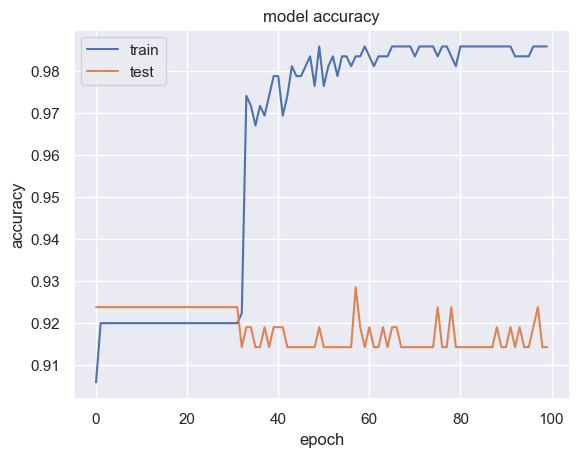

In [58]:
#training and validation accuracy Report
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

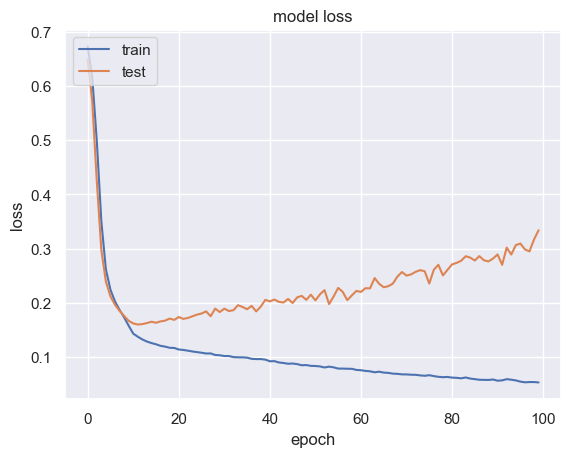

In [59]:
#training and validation loss Report
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.



## Anwsers
* We are able to classify Legendary target feature wrt multiple categorical and numberical independent features like 'Total', 'HP', 'Attack','Defense','Sp. Atk', 'Sp. Def','Speed' ,'Type 1','Generation'
* In data cleaning we handled Missing values, Outliers threatment and data transformation for categorical and numberical features 
* Dropped Id and name features due to PII data